In [2]:
import pandas as pd
import numpy as np

### Dataset creation

In [3]:
# Create a DataFrame for whether or not a person plays tennis. 
# It has discrete features and 14 rows.

df = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

### Counting values of outcome variable (useful for calculating entropy)

In [5]:
ser = df['PlayTennis'].value_counts()
ser

Yes    9
No     5
Name: PlayTennis, dtype: int64

### Using cross tab to quickly capture the relationship between two variables

In [9]:
df_out = pd.crosstab(df['Outlook'], df['PlayTennis'])
df_out

PlayTennis,No,Yes
Outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [7]:
df_out.index, df_out.columns

(Index(['Overcast', 'Rain', 'Sunny'], dtype='object', name='Outlook'),
 Index(['No', 'Yes'], dtype='object', name='PlayTennis'))

In [10]:
e = df_out.sum(axis=1)
e

Outlook
Overcast    4
Rain        5
Sunny       5
dtype: int64

In [11]:
# Find the fraction of each row that is a 'Yes' and 'No' for PlayTennis
df_out['Yes'] = df_out['Yes'] / e
df_out['No'] = df_out['No'] / e
df_out

PlayTennis,No,Yes
Outlook,,
Overcast,0.0,1.0
Rain,0.4,0.6
Sunny,0.6,0.4


### More efficient cross tabulation (using normalize)

In [8]:
pd.crosstab(df['Outlook'], df['PlayTennis'], normalize='index')

PlayTennis,No,Yes
Outlook,,
Overcast,0.0,1.0
Rain,0.4,0.6
Sunny,0.6,0.4


### Using pd.groupby()

In [13]:
df.groupby(["Outlook"]).groups

{'Overcast': [2, 6, 11, 12], 'Rain': [3, 4, 5, 9, 13], 'Sunny': [0, 1, 7, 8, 10]}

In [14]:
df.groupby(["Outlook"]).get_group("Sunny")

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [15]:
df.groupby(["Outlook"]).get_group("Sunny")["PlayTennis"]

0      No
1      No
7      No
8     Yes
10    Yes
Name: PlayTennis, dtype: object

In [16]:
df.groupby(["Outlook"]).get_group("Sunny")["PlayTennis"].value_counts()

No     3
Yes    2
Name: PlayTennis, dtype: int64

In [18]:
df.groupby(["Outlook", "PlayTennis"]).groups

{('Overcast', 'Yes'): [2, 6, 11, 12], ('Rain', 'No'): [5, 13], ('Rain', 'Yes'): [3, 4, 9], ('Sunny', 'No'): [0, 1, 7], ('Sunny', 'Yes'): [8, 10]}

In [19]:
df.groupby(["Outlook", "PlayTennis"]).get_group(("Sunny", "Yes"))

,Outlook,Temperature,Humidity,Wind,PlayTennis
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [20]:
df.groupby(["Outlook", "PlayTennis"]).size()

Outlook   PlayTennis
Overcast  Yes           4
Rain      No            2
          Yes           3
Sunny     No            3
          Yes           2
dtype: int64

In [16]:
df.groupby(["Outlook", "PlayTennis"]).size().index

MultiIndex([('Overcast', 'Yes'),
            (    'Rain',  'No'),
            (    'Rain', 'Yes'),
            (   'Sunny',  'No'),
            (   'Sunny', 'Yes')],
           names=['Outlook', 'PlayTennis'])

In [21]:
df.groupby(["Outlook", "PlayTennis"]).size().unstack()

PlayTennis,No,Yes
Outlook,,
Overcast,NaN,4.0
Rain,2.0,3.0
Sunny,3.0,2.0


In [22]:
df.groupby(["Outlook", "PlayTennis"]).size().unstack(fill_value=0)

PlayTennis,No,Yes
Outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


### Using pd.pivot_table 

In [23]:
pivot_table = df.pivot_table(index='Outlook', columns='PlayTennis', aggfunc='size', fill_value=0)
pivot_table

PlayTennis,No,Yes
Outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


<AxesSubplot:xlabel='Outlook'>

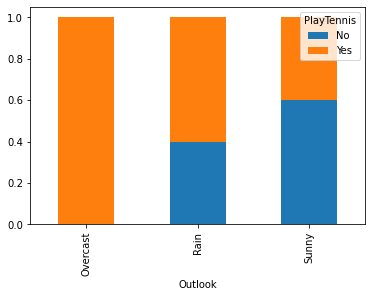

In [24]:
df_out.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Outlook'>

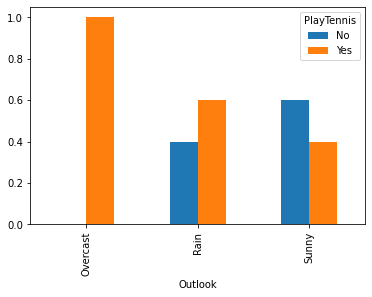

In [25]:
df_out.plot(kind='bar', stacked=False)